Importing the libraries

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()

Saving Online_Retail.xlsx to Online_Retail.xlsx


In [3]:
filename = list(uploaded.keys())[0]

In [4]:
file_path = '/content/OnlineRetail.xlsx'

Importing the open source online retail dataset

In [5]:
df = pd.read_excel('Online_Retail.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Checking the countries for which the dataset is available

In [6]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

Choosing to analyse the customer segmentation for the Switzerland and Norway

Extracting the data for Switzerland from the main dataset

In [7]:
df_swiss=df.loc[df['Country'] == 'Switzerland']
df_swiss.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
37620,492446,84997B,RED 3 PIECE MINI DOTS CUTLERY SET,24,2009-12-17 11:11:00,3.75,13520.0,Switzerland
37621,492446,84997C,BLUE 3 PIECE MINI DOTS CUTLERY SET,24,2009-12-17 11:11:00,3.75,13520.0,Switzerland
37622,492446,21432,SET OF 3 CASES WOODLAND DESIGN,4,2009-12-17 11:11:00,5.95,13520.0,Switzerland
37623,492446,84997D,PINK 3 PIECE MINI DOTS CUTLERY SET,6,2009-12-17 11:11:00,3.75,13520.0,Switzerland
37624,492446,21731,RED TOADSTOOL LED NIGHT LIGHT,36,2009-12-17 11:11:00,1.65,13520.0,Switzerland


Converting Invoice Dates to date time format and making a new column named Amount which tells the total money spent on that invoice

In [9]:
df_swiss['InvoiceDate']= pd.to_datetime(df_swiss['InvoiceDate'],errors='coerce')
df_swiss["Amount"] = df_swiss["Quantity"] * df_swiss["Price"]
df_swiss.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Amount
37620,492446,84997B,RED 3 PIECE MINI DOTS CUTLERY SET,24,2009-12-17 11:11:00,3.75,13520.0,Switzerland,90.0
37621,492446,84997C,BLUE 3 PIECE MINI DOTS CUTLERY SET,24,2009-12-17 11:11:00,3.75,13520.0,Switzerland,90.0
37622,492446,21432,SET OF 3 CASES WOODLAND DESIGN,4,2009-12-17 11:11:00,5.95,13520.0,Switzerland,23.8
37623,492446,84997D,PINK 3 PIECE MINI DOTS CUTLERY SET,6,2009-12-17 11:11:00,3.75,13520.0,Switzerland,22.5
37624,492446,21731,RED TOADSTOOL LED NIGHT LIGHT,36,2009-12-17 11:11:00,1.65,13520.0,Switzerland,59.4


Checking the start and end date of the Switzerland dataframe

In [10]:
print('Min{};Max{}'.format(min(df_swiss.InvoiceDate),max(df_swiss.InvoiceDate)))

Min2009-12-17 11:11:00;Max2010-12-03 10:36:00


Creating a Snapshot date which would count the number of days since the Invoice date to a hypothetical date for analysis of the particular customer and add 1 to it so that the initial date is not 0. This would calculate the "Recency"

In [11]:
snapshot_date=max(df_swiss.InvoiceDate)+ datetime.timedelta(days=1)
snapshot_date

Timestamp('2010-12-04 10:36:00')

Making a new dataframe which depicts the Recency. This is a measure that shows the number of days passed since the last purchase.

In [13]:
recency_df = df_swiss.groupby(by='Customer ID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['Customer ID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (snapshot_date - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,Customer ID,Recency
0,12357.0,17
1,12371.0,38
2,12376.0,18
3,12377.0,10
4,12378.0,191


Making a new dataframe which depicts the Frequency. This is a measure of the number of purchases

In [16]:
frequency_df = df_swiss.groupby(by=['Customer ID'], as_index=False)['Invoice'].count()
frequency_df.columns = ['Customer ID','Frequency']
frequency_df.head()

,Customer ID,Frequency
0,12357.0,165
1,12371.0,104
2,12376.0,13
3,12377.0,75
4,12378.0,82


Making a new dataframe named Monetary which depicts the total monetary value spent by the customer.

In [18]:
monetary_df = df_swiss.groupby(by='Customer ID',as_index=False).agg([('Amount','sum')])
monetary_df=monetary_df[['Amount']]
monetary_df.head()

,Amount
,Amount
Customer ID,
12357.0,12079.99
12371.0,2179.42
12376.0,503.15
12377.0,1798.20
12378.0,1407.70


Merging the three dataframes

In [19]:
temp_df = recency_df.merge(frequency_df,on='Customer ID')
rfm_df = temp_df.merge(monetary_df,on='Customer ID')
rfm_df.set_index('Customer ID',inplace=True)
rfm_df.rename(columns = {'Recency': 'Recency','Frequency': 'Frequency',('Amount', 'Amount'): 'Monetary'}, inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
Customer ID,,,
12357.0,17,165,12079.99
12371.0,38,104,2179.42
12376.0,18,13,503.15
12377.0,10,75,1798.20
12378.0,191,82,1407.70


## K-Means Clustering

Using the Elbow Method to determine the right amount of clusters that can be formed for the given dataframe using the sum of square error

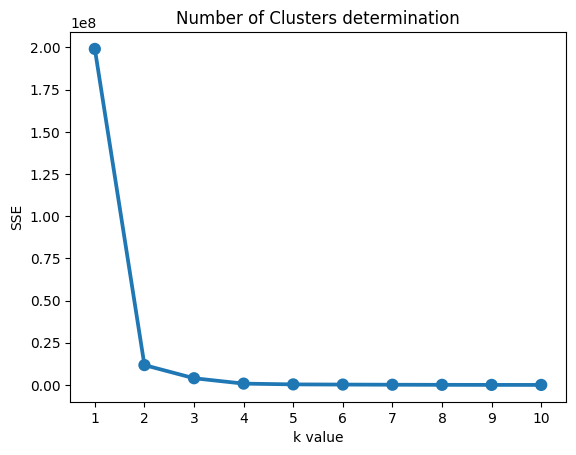

In [20]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(rfm_df)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('Number of Clusters determination')
plt.xlabel('k value')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Number of clusters=3

Fitting the model on the dataset

In [21]:
model = KMeans(n_clusters=3, random_state=40)
model.fit(rfm_df)

KMeans(n_clusters=3, random_state=40)

Assigning clusters

In [22]:
rfm_df["Cluster"] = model.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12357.0,17,165,12079.99,1
12371.0,38,104,2179.42,0
12376.0,18,13,503.15,0
12377.0,10,75,1798.20,0
12378.0,191,82,1407.70,0


Counting number of customers in each cluster

In [23]:
rfm_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          67.1      58.8   1242.4    10
1          33.5     161.5  12056.8     2
2          46.5     138.0   3403.0     2

Normalizing the data

In [24]:
df_rfm = pd.DataFrame(rfm_df, columns=['Recency', 'Frequency', 'Monetary'])
df_rfm['ID'] = rfm_df.index
df_rfm['Cluster'] = model.labels_
df_rfm.head()

,Recency,Frequency,Monetary,ID,Cluster
Customer ID,,,,,
12357.0,17,165,12079.99,12357.0,1
12371.0,38,104,2179.42,12371.0,0
12376.0,18,13,503.15,12376.0,0
12377.0,10,75,1798.20,12377.0,0
12378.0,191,82,1407.70,12378.0,0


Preparing the data for visualisation using a snake plot

In [25]:
rfm = pd.melt(df_rfm.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
rfm.head()

,ID,Cluster,Attribute,Value
0,12357.0,1,Recency,17.0
1,12371.0,0,Recency,38.0
2,12376.0,0,Recency,18.0
3,12377.0,0,Recency,10.0
4,12378.0,0,Recency,191.0


<Axes: xlabel='Attribute', ylabel='Value'>

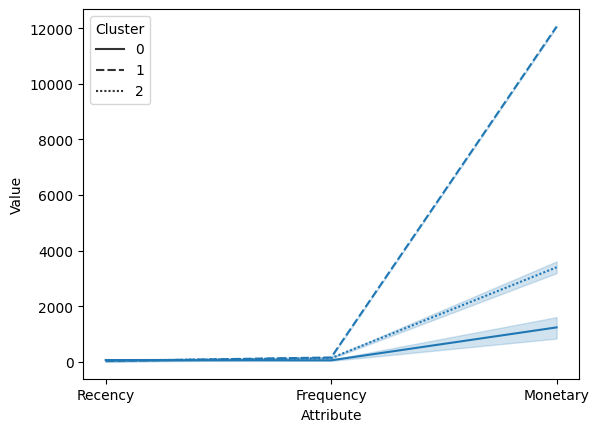

In [26]:
import seaborn as sns

# Create the lineplot with default colors
sns.lineplot(x='Attribute', y='Value', style='Cluster', data=rfm)


Cluster 1: Best customers

Cluster 2: Lost customers

Cluster 0: Potential customers

In [27]:
df_rfm=df_rfm.reset_index()
df_rfm=df_rfm.reset_index()
df_rfm.head()

,index,Customer ID,Recency,Frequency,Monetary,ID,Cluster
0,0,12357.0,17,165,12079.99,12357.0,1
1,1,12371.0,38,104,2179.42,12371.0,0
2,2,12376.0,18,13,503.15,12376.0,0
3,3,12377.0,10,75,1798.20,12377.0,0
4,4,12378.0,191,82,1407.70,12378.0,0


Dot plot for cluster visualization

In [28]:
import plotly.graph_objects as go

fig = go.Figure()

cluster_counts = df_rfm['Cluster'].value_counts()

fig.add_trace(go.Pie(
    labels=cluster_counts.index,
    values=cluster_counts.values,
    marker=dict(colors=df_rfm['Cluster'].unique()),
    textinfo='label+percent',
    textposition='inside',
))

fig.update_layout(
    title="Customer Clusters",
    autosize=False,
    width=500,
    height=500,
    font=dict(size=15),
    plot_bgcolor='#DDCFF4'
)

fig.show()
